# Tutorial 1 - MBP Biostatistics 2022

Welcome to the MBP biostatistics module in 2022-2023! This notebook will go over some basic ideas in python that will be useful for your homework assignments. This first block has some reference material before the questions we'll solve in groups in the tutorial. 

In [22]:
# This is a comment
# To run this block, use Shift+Enter

# Importing packages
import this

In [23]:
# print words onto the console
print('Hello, world!')
#same as using double quotes e.g., print("Hello, world!") 

Hello, world!


In [24]:
# variables
x = 'Hello, world!'
print(x)

Hello, world!


In [25]:
# printing numbers and words
p = 0.04
print(f"p = {p}") #generally recommended, faster and more readable
#"f" for "formatting" to format the variable inside the string
# or
print("p =", p) 

p = 0.04
p = 0.04


In [26]:
# lists and basic operations
!pip install numpy
#exclamation point sends command to computer shell (can also use terminal/anaconda to install packages)
import numpy as np

grades = [90, 97, 86, 84, 82, 90, 93]
avg = np.mean(grades)
std = np.std(grades)

print(sorted(grades)) #numpy.sort instead of python "sorted" could also be used

print(f"Average = {round(avg, 2)}, Std.Dev = {round(std, 2)}") #2 decimal places

[82, 84, 86, 90, 90, 93, 97]
Average = 88.86, Std.Dev = 4.85


In [27]:
# for loops
for i in range(5):
    print(i)
    
#python always starts with 0

y = [i for i in range(5)] #outputs list "y"

print(y)

0
1
2
3
4
[0, 1, 2, 3, 4]


In [28]:
# if statements
if 1 < 2:
    print('True')
    
if not True:
    print('False')

True


In [29]:
# functions

def func(a, b):
    """
    Function that adds and b  (#doc string documents what the code is doing)
    """
    
    return a + b

print(func(2, 3))

5


In [30]:
# load csv or tsv file
import pandas as pd
df = pd.read_csv('sample.tsv', sep='\t')

print(df["Some parameter"])
print(df["Other parameter"])
print(df["Last parameter"])

df.head()

TimeoutError: [Errno 60] Operation timed out

To write plain text in a jupyter notebook, use the 'Markdown' option for a code block. To make header blocks, use the # character. You can type LaTeX equations if you want, with equation structure such as

$$ a^2 + b^2 = c^2.$$

You can make italics and bold text using the * character: *this is italic text*, and **this is bold text**.

In [122]:
# plotting
!pip install matplotlib
import matplotlib.pyplot as plt

plt.figure()
plt.plot(grades)
plt.xlabel('Student Number')
plt.ylabel('Grade')
plt.title('Student Grades')
plt.show()
plt.close()

## Problem 1
Make a descriptive plot that accurately conveys the distribution of student grades on the exam. For this and all plots, please label your axes and add a descriptive title.

In [185]:
# There are several approaches to visualizing a distribution, the most common of which are histograms and boxplots
# We will plot them both below

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(9, 2)) # Plot a grid of figures (nrows,ncolums) - in this case, 1x3

# First plot
axs[0].plot(grades)
axs[0].set(title='Default Plot of Student Grades',xlabel='Student Number',ylabel='Grade')

# Second plot
axs[1].hist(grades, bins=10) # You can play around with the number of bins
axs[1].set(title='Histogram of Student Grades',xlabel='Grade',ylabel='Frequency')

# Third plot
axs[2].boxplot(grades) # You can play around with the number of bins
axs[2].set(title='Boxplot of Student Grades',xlabel=' ',ylabel='Grade')

# Output multiple plots at once
fig.subplots_adjust(hspace=0.8, wspace=0.8)
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

## Problem 2
From the file `airtravel.csv`, plot the distribution of flights over the three years 1958, 1959, 1960. Note that these numbers are in units of 1000 passengers. 

In [40]:
at = pd.read_csv('airtravel.csv')
at.head()

Month  1958  1959  1960
0   JAN   340   360   417
1   FEB   318   342   391
2   MAR   362   406   419
3   APR   348   396   461
4   MAY   363   420   472

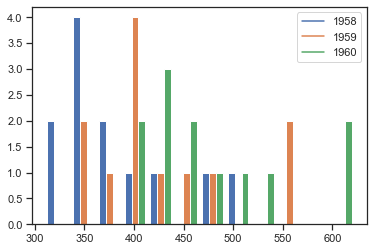

In [208]:
plt.figure()

plt.hist(at.loc[:, at.columns != 'Month'], label=at.columns != 'Month', bins=int(180/15))
plt.legend(handles=[line1,line2,line3])

plt.show()
plt.close()

## Problem 3
Plot the distribution of flights over the 12 months of the year. Given that we only have three data points for each month, an errorbar plot will work well using the mean and standard deviation of the data for each month.

<ErrorbarContainer object of 3 artists>

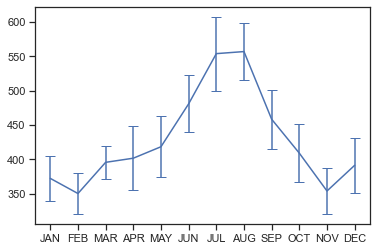

In [207]:
import numpy as np

num_data = at.loc[:, at.columns != 'Month']

# Calculate the average of each month over the 3 years
means = round(np.mean(num_data,axis=1),2)
# Calculate the standard deviation of each month over the 3 years
stds = round(np.std(num_data,axis=1),2)

plt.errorbar(at['Month'],means,yerr=stds,capsize=5)

## Bonus Problem
What is a good way to visualize the flight frequency over both month and year in the same plot?

In [209]:
plt.figure()

# Plot each line as the distribution for that year and give it a label
line1, = plt.plot(at['1958'], label='1958')
line2, = plt.plot(at['1959'], label='1959')
line3, = plt.plot(at['1960'], label='1960')
# Add a legend for the labels above
plt.legend(handles=[line1,line2,line3])

plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights')
plt.xticks(list(range(12)), labels=at['Month'], rotation ='vertical')

plt.show()
plt.close()